In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/kerela - Sheet1.csv')

# DATA ANALYSIS

In [ ]:
data

,S NO,Start Date,End Date,Duration(Days),Main Cause,Location,Districts,State,DTR,CWD,TN10P,TX10P,FLOOD
0,1,03-09-2013,03-09-2013,0,Heavy rains,NaN,Wayanad,KERALA,13.395041,79,19.308000,28.973000,YES
1,2,03-12-2013,03-12-2013,0,Heavy rains,NaN,Kannur,KERALA,8.443452,75,24.025041,32.095178,YES
2,3,26-03-2013,26-03-2013,0,Heavy rains,NaN,Thiruvananthapuram,KERALA,8.680247,48,25.670548,34.175945,YES
3,4,29-03-2013,31-03-2013,2,Heavy rains,NaN,Wayanad,KERALA,13.395041,79,19.308000,28.973000,YES
4,5,26/04/13,28/04/13,2,Heavy rains,NaN,Wayanad,KERALA,13.395041,79,19.308000,28.973000,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,142,NaN,"Aug,2012",NaN,NaN,NaN,Kodikulam,Kerala,8.732600,43,21.097534,31.511370,NO
142,143,NaN,"July,2012",NaN,NaN,NaN,Hasan,Karnataka,9.911370,36,16.739644,26.975507,NO
143,144,NaN,"June , 2013",NaN,NaN,NaN,Ooty,KARNATAKA,8.954356,71,10.196986,19.890000,NO
144,145,NaN,"Jan , 2014",NaN,NaN,NaN,Hubballi,KARNATAKA,9.473507,42,20.326301,30.730521,NO


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# DROPPING UNWANTED COLUMNS

In [ ]:
data.drop(['S NO'] ,axis = 1 ,inplace = True)
data.drop(['Start Date'] ,axis = 1 ,inplace = True)
data.drop(['End Date'] ,axis = 1 ,inplace = True)
data.drop(['Duration(Days)'] ,axis = 1 ,inplace = True)
data.drop(['Main Cause'] ,axis = 1 ,inplace = True)
data.drop(['Location'] ,axis = 1 ,inplace = True)
data.drop(['Districts'] ,axis = 1 ,inplace = True)
data.drop(['State'] ,axis = 1 ,inplace = True)

In [ ]:
data

,DTR,CWD,TN10P,TX10P,FLOOD
0,13.395041,79,19.308000,28.973000,YES
1,8.443452,75,24.025041,32.095178,YES
2,8.680247,48,25.670548,34.175945,YES
3,13.395041,79,19.308000,28.973000,YES
4,13.395041,79,19.308000,28.973000,YES
...,...,...,...,...,...
141,8.732600,43,21.097534,31.511370,NO
142,9.911370,36,16.739644,26.975507,NO
143,8.954356,71,10.196986,19.890000,NO
144,9.473507,42,20.326301,30.730521,NO


# LABEL ENCODING

In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
data['FLOOD']= label_encoder.fit_transform(data['FLOOD'])

data['FLOOD'].value_counts()

## No Defect == "1" && Defect == "0"

1    84
0    62
Name: FLOOD, dtype: int64

In [ ]:
data.describe()

,DTR,CWD,TN10P,TX10P,FLOOD
count,146.000000,146.000000,146.000000,146.000000,146.000000
mean,9.808871,53.109589,22.288719,29.648605,0.575342
std,2.503801,20.637804,3.179395,5.299533,0.495992
min,1.184438,4.000000,10.196986,9.990800,0.000000
25%,8.479863,35.250000,19.670000,28.973000,0.000000
50%,8.977678,54.000000,23.173096,31.331507,1.000000
75%,10.249123,68.000000,24.783151,32.805079,1.000000
max,20.019671,87.000000,27.269000,35.382411,1.000000


## CORRELATION AND P-VALUE

In [ ]:
x = data.corr()
x

,DTR,CWD,TN10P,TX10P,FLOOD
DTR,1.000000,-0.112740,-0.336833,0.040307,-0.199001
CWD,-0.112740,1.000000,-0.187948,-0.005220,0.286876
TN10P,-0.336833,-0.187948,1.000000,0.108475,0.074922
TX10P,0.040307,-0.005220,0.108475,1.000000,0.329144
FLOOD,-0.199001,0.286876,0.074922,0.329144,1.000000


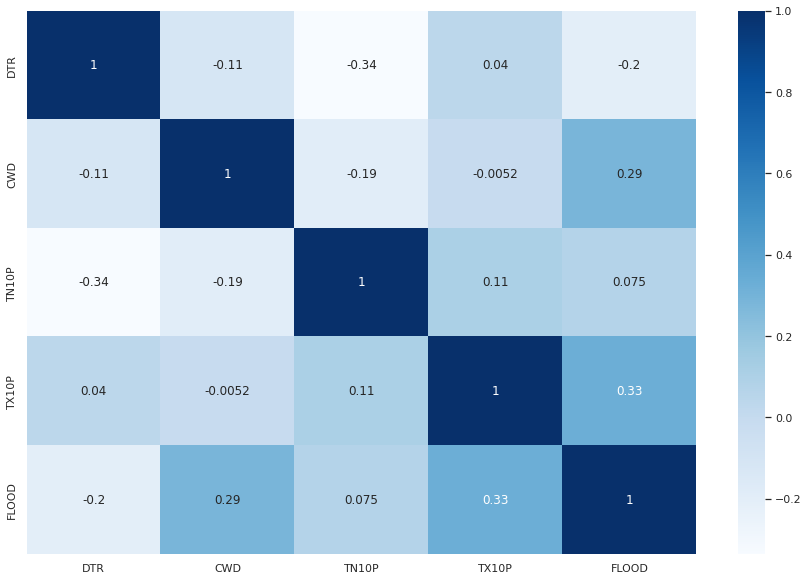

In [ ]:
sns.set(rc = {'figure.figsize' : (15,10)})
dataplot = sns.heatmap(x,cmap ="Blues", annot=True)

In [ ]:
tau, p_value = stats.kendalltau(data['DTR'], data['FLOOD'])
print(f"Kendall Rank correlation:%.5f" %tau)
print(f"P VALUE: %.5f" %p_value)

Kendall Rank correlation:-0.18461
P VALUE: 0.00715


In [ ]:
tau, p_value = stats.kendalltau(data['CWD'], data['FLOOD'])
print(f"Kendall Rank correlation:%.5f" %tau)
print(f"P VALUE: %.5f" %p_value)

Kendall Rank correlation:0.21379
P VALUE: 0.00215


In [ ]:
tau, p_value = stats.kendalltau(data['TN10P'], data['FLOOD'])
print(f"Kendall Rank correlation:%.5f" %tau)
print(f"P VALUE: %.5f" %p_value)

Kendall Rank correlation:0.08921
P VALUE: 0.19678


In [ ]:
tau, p_value = stats.kendalltau(data['TX10P'], data['FLOOD'])
print(f"Kendall Rank correlation:%.5f" %tau)
print(f"P VALUE: %.5f" %p_value)

Kendall Rank correlation:0.16472
P VALUE: 0.01739


## *BOX-PLOTS AND OUTLIERS ANALYSIS*




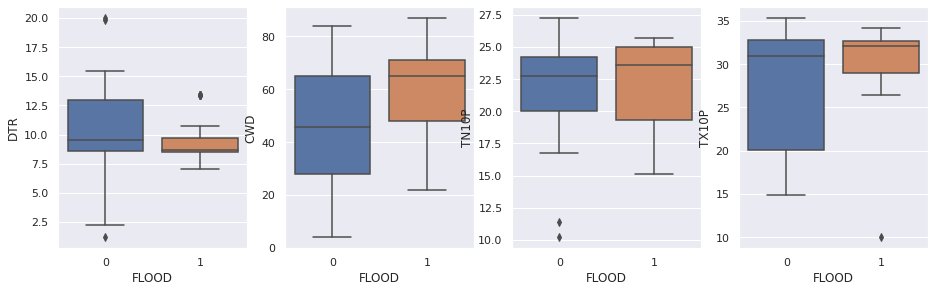

In [ ]:
plt.figure(figsize=(40,40))
plt.subplots_adjust(hspace=1)
i=1
for col_name in data.drop(columns=["FLOOD"],axis=1).columns:
    plt.subplot(5,10, i)
    sns.boxplot(data=data, x='FLOOD', y=col_name)
    i+=1

# TEST TRAIN SPLIT

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop(['FLOOD'],axis=1)
y = data['FLOOD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100, shuffle=True)

In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
141    0
142    0
143    0
144    0
145    0
Name: FLOOD, Length: 146, dtype: int64

In [ ]:
# importing modules
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold

# metric 
from sklearn.metrics import confusion_matrix, classification_report

# STANDARDIZATION 

In [ ]:
# importing libraries
from sklearn.preprocessing import StandardScaler, QuantileTransformer, RobustScaler

# Standard Scalar 
sscaler = StandardScaler()
X_train_ss = sscaler.fit_transform(X_train)
X_test_ss = sscaler.transform(X_test)

# Quantile Transformer 
qscaler = QuantileTransformer(n_quantiles=100, random_state=43, output_distribution='normal')
X_train_qf = qscaler.fit_transform(X_train)
X_test_qf = qscaler.transform(X_test)

# Robust Scalar
rscaler = RobustScaler(with_scaling=True)
X_train_rs = rscaler.fit_transform(X_train)
X_test_rs = rscaler.transform(X_test)

# Fitting Models on both real data and SMOTE generated data

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)*100
confusion_mat = confusion_matrix(y_test,y_pred)

print("Accuracy is",accuracy)
print("Confusion Matrix")
print(confusion_mat)

Accuracy is 76.66666666666667
Confusion Matrix
[[ 7  6]
 [ 1 16]]


In [ ]:
## Standard Scaler
from sklearn.metrics import confusion_matrix, accuracy_score
logistic_model = LogisticRegression()
logistic_model.fit(X_train_ss, y_train)
y_pred = logistic_model.predict(X_test_ss)

accuracy = accuracy_score(y_test,y_pred)*100
confusion_mat = confusion_matrix(y_test,y_pred)

print("Accuracy is",accuracy)
print("Confusion Matrix")
print(confusion_mat)

Accuracy is 76.66666666666667
Confusion Matrix
[[ 7  6]
 [ 1 16]]


In [ ]:
## Quantile Scaler
from sklearn.metrics import confusion_matrix, accuracy_score
logistic_model = LogisticRegression()
logistic_model.fit(X_train_qf, y_train)
y_pred = logistic_model.predict(X_test_qf)

accuracy = accuracy_score(y_test,y_pred)*100
confusion_mat = confusion_matrix(y_test,y_pred)

print("Accuracy is",accuracy)
print("Confusion Matrix")
print(confusion_mat)

Accuracy is 70.0
Confusion Matrix
[[ 6  7]
 [ 2 15]]


# LOGISTIC REGRESSION (OPTUNA)

In [ ]:
pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 KB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 9.5 MB/s eta 0:00:00


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score
from scipy.stats import skew
from sklearn.model_selection import KFold, cross_val_score

import optuna

In [ ]:
models = {
    'logistic regression' : LogisticRegression()
}

In [ ]:
for name, model in models.items():
    model.fit(X_train,y_train)
    print(f'{name} trained')

logistic regression trained


In [ ]:
results = {}

kf = KFold(n_splits= 10)

for name, model in models.items():
    result = cross_val_score(model, X_train, y_train, scoring= 'roc_auc', cv= kf)
    results[name] = result

In [ ]:
for name, result in results.items():
    print("----------------")
    print(f'{name} : {np.mean(result)}')

----------------
logistic regression : 0.7317559523809524


In [ ]:
def lr_objective(trial):
    tol = trial.suggest_loguniform('tol', 1e-7, 0.1)
    C = trial.suggest_float('C', 0, 0.1)
    max_iter = trial.suggest_int('max_iter', 50, 600)

    model = LogisticRegression(
        solver= 'liblinear',
        penalty= 'l1',
        tol= tol,
        C= C,
        max_iter= max_iter
    )

    model.fit(X_train,y_train)
    cv_score = cross_val_score(model, X_train,y_train, scoring= 'roc_auc', cv= kf)

    return np.mean(cv_score)

In [ ]:
study = optuna.create_study(direction= 'maximize')
study.optimize(lr_objective, n_trials= 30)

[I 2023-01-23 17:56:34,980] A new study created in memory with name: no-name-9f2a8542-aa3c-44e6-a457-192160c0af8e
<ipython-input-57-e86b8813fd7f>:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  tol = trial.suggest_loguniform('tol', 1e-7, 0.1)
[I 2023-01-23 17:56:35,112] Trial 0 finished with value: 0.7387499999999999 and parameters: {'tol': 0.0023549470741415636, 'C': 0.09736013839173097, 'max_iter': 338}. Best is trial 0 with value: 0.7387499999999999.
<ipython-input-57-e86b8813fd7f>:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  tol = trial.suggest_loguniform('tol', 1e-7, 0.1)
[I 2023-01-23 17:56:35,251] Trial 1 finished with value: 0.6988

In [ ]:
best_params = study.best_params

In [ ]:
lr = LogisticRegression(**best_params)
lr.fit(X_train,y_train)
y_test_pred_lr = lr.predict_proba(X_test)[:, 1]

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test,y_pred)*100
print("Accuracy is",accuracy)

[[10  3]
 [ 1 16]]
              precision    recall  f1-score   support

           0       0.91      0.77      0.83        13
           1       0.84      0.94      0.89        17

    accuracy                           0.87        30
   macro avg       0.88      0.86      0.86        30
weighted avg       0.87      0.87      0.86        30

Accuracy is 86.66666666666667


# UPSAMPLING DATA TO PREVENT OVERFITTING

In [ ]:
# Using Imblearn
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from imblearn.over_sampling import SMOTE
smote  = SMOTE()

In [ ]:
X_train_smote,y_train_smote = smote.fit_resample(X_train.astype('float'),y_train)

In [ ]:
from collections import Counter
print("Before smote :",Counter(y_train))
print("After smote :",Counter(y_train_smote))

Before smote : Counter({1: 67, 0: 49})
After smote : Counter({0: 67, 1: 67})


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
logistic_model = LogisticRegression()
logistic_model.fit(X_train_smote, y_train_smote)
y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)*100
confusion_mat = confusion_matrix(y_test,y_pred)

print("Accuracy is",accuracy)
print("Confusion Matrix")
print(confusion_mat)

Accuracy is 66.66666666666666
Confusion Matrix
[[ 7  6]
 [ 4 13]]


In [ ]:
# with upsampling
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=30, max_depth=10, random_state=1)
random_forest.fit(X_train_smote, y_train_smote)
from sklearn.metrics import accuracy_score

y_predict = random_forest.predict(X_test)
accuracy_score(y_test, y_predict)*100

90.0

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# without upsampling
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.853
Accuracy score (validation): 0.800
Learning rate:  0.075
Accuracy score (training): 0.853
Accuracy score (validation): 0.767
Learning rate:  0.1
Accuracy score (training): 0.871
Accuracy score (validation): 0.767
Learning rate:  0.25
Accuracy score (training): 0.948
Accuracy score (validation): 0.767
Learning rate:  0.5
Accuracy score (training): 0.983
Accuracy score (validation): 0.833
Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 0.867
Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 0.900


In [ ]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[ 8  5]
 [ 0 17]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.62      0.76        13
           1       0.77      1.00      0.87        17

    accuracy                           0.83        30
   macro avg       0.89      0.81      0.82        30
weighted avg       0.87      0.83      0.82        30



# XGBOOST

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# without upsampling
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
score = xgb_clf.score(X_test, y_test)
print(score)

0.9


In [ ]:
# with upsampling
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train_smote, y_train_smote)
score = xgb_clf.score(X_test, y_test)

y_pred_xgb=xgb_clf.predict(X_test)
confusion_mat = confusion_matrix(y_test,y_pred_xgb)
print("accuracy :",score*100)
print("confusion matrix :",confusion_mat)
print("Classification report :",classification_report(y_test,y_pred_xgb) )

accuracy : 93.33333333333333
confusion matrix : [[12  1]
 [ 1 16]]
Classification report :               precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.94      0.94      0.94        17

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

